### Exercise 2 – Programming task

**2.**

In [12]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
X = iris.data
petal_length, petal_width = X[:, 2], X[:, 3]

In [13]:
from sklearn.mixture import GaussianMixture

bic_scores = []
for k in range(2, 7):
    gmm = GaussianMixture(n_components=k, random_state=2782).fit(X)
    bic_scores.append(gmm.bic(X))
    print(f"K={k}, BIC: {bic_scores[-1]:.2f}")

optimal_k = np.argmin(bic_scores) + 2  # +2 since K starts at 2
print(f"Optimal K via BIC: {optimal_k}")

K=2, BIC: 574.02
K=3, BIC: 580.86
K=4, BIC: 625.44
K=5, BIC: 669.83
K=6, BIC: 728.99
Optimal K via BIC: 2


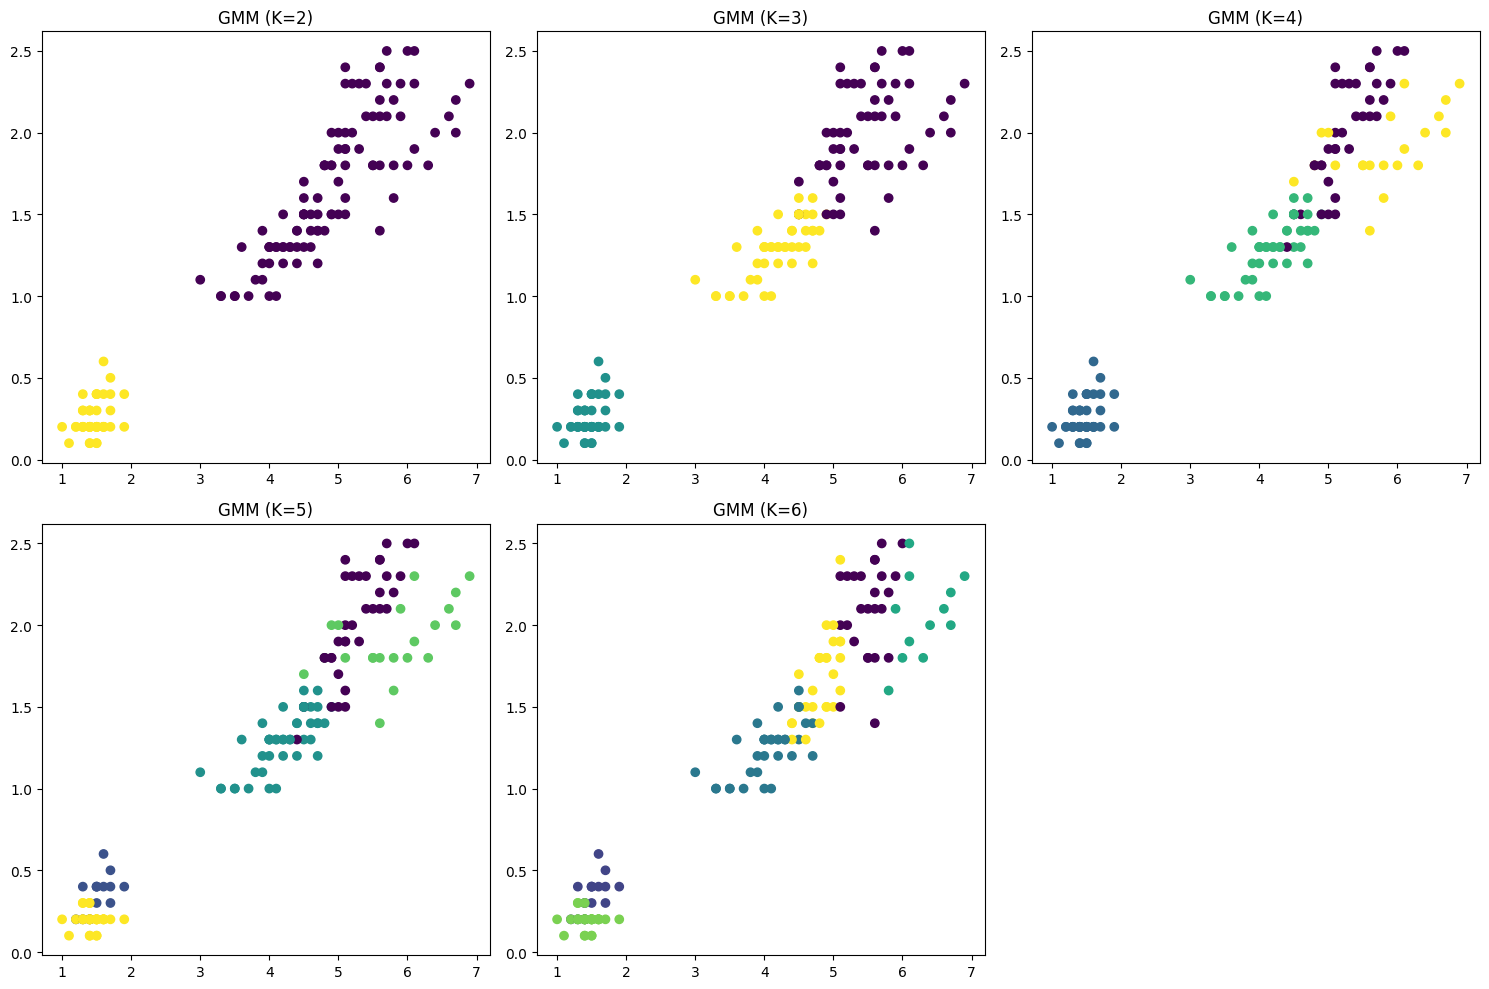

In [14]:
plt.figure(figsize=(15, 10))
for k in range(2, 7):
    gmm = GaussianMixture(n_components=k, random_state=2782).fit(X)
    labels = gmm.predict(X)
    plt.subplot(2, 3, k-1)
    plt.scatter(petal_length, petal_width, c=labels, cmap='viridis')
    plt.title(f'GMM (K={k})')
plt.tight_layout()
plt.show()

GMM (K=2), Silhouette Score: 0.687


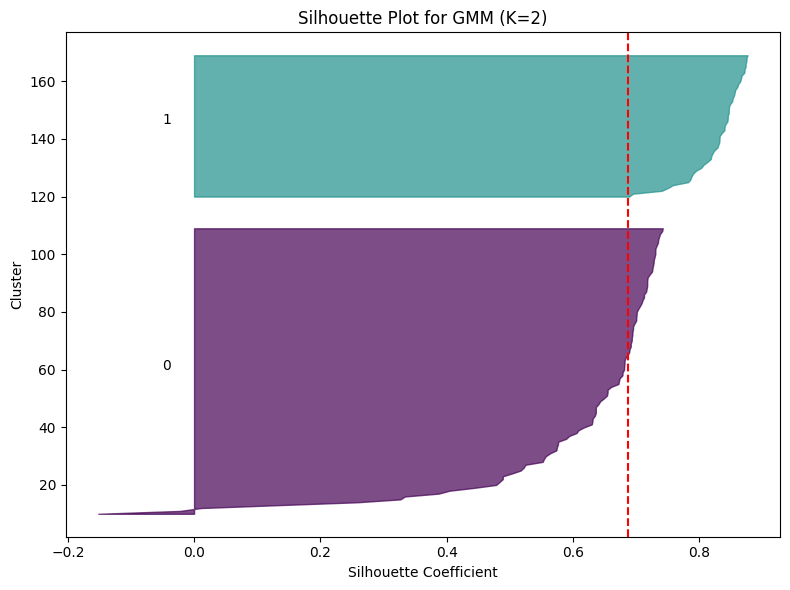

GMM (K=3), Silhouette Score: 0.501


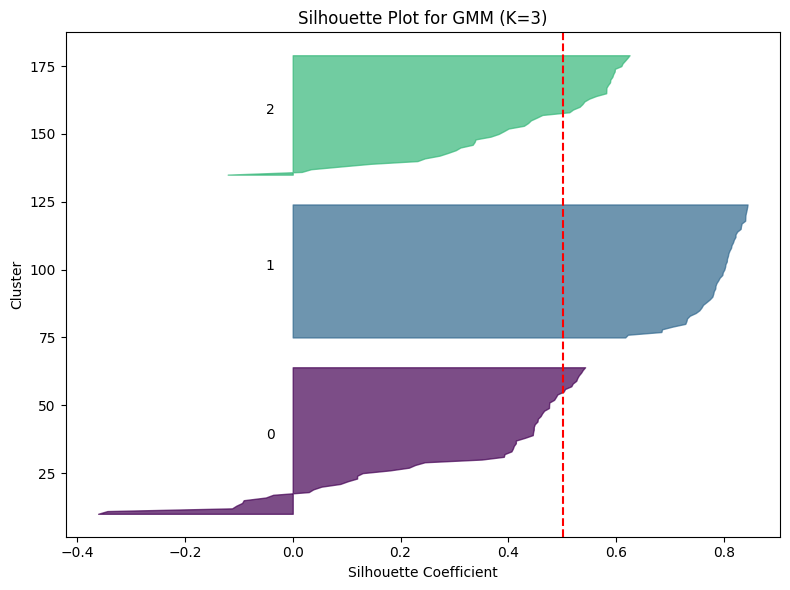

GMM (K=4), Silhouette Score: 0.405


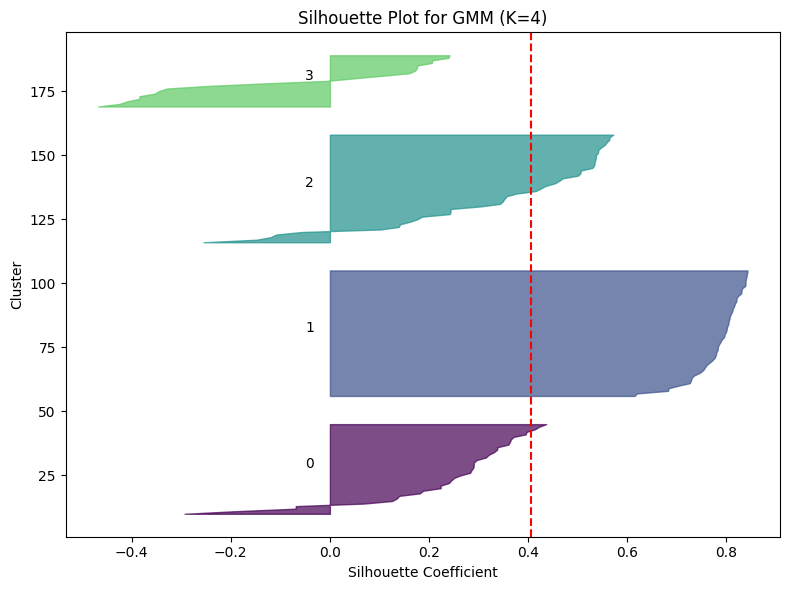

GMM (K=5), Silhouette Score: 0.231


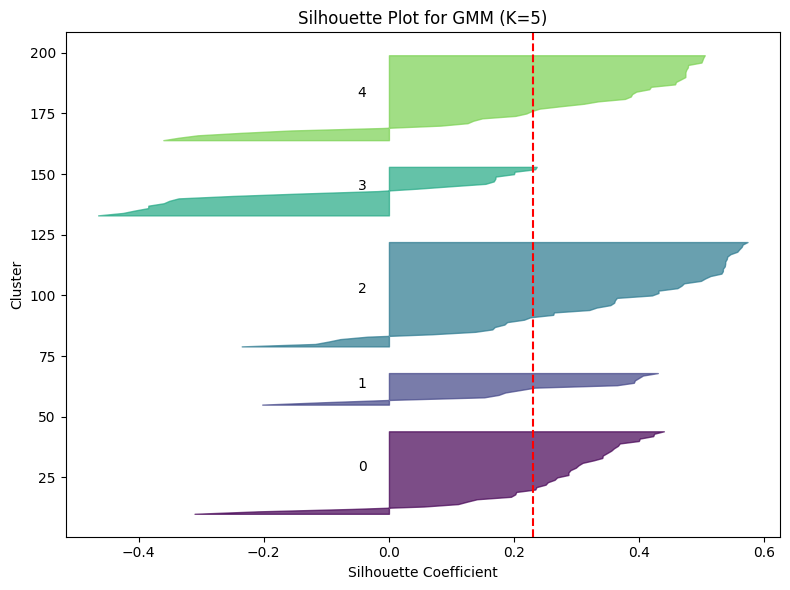

GMM (K=6), Silhouette Score: 0.278


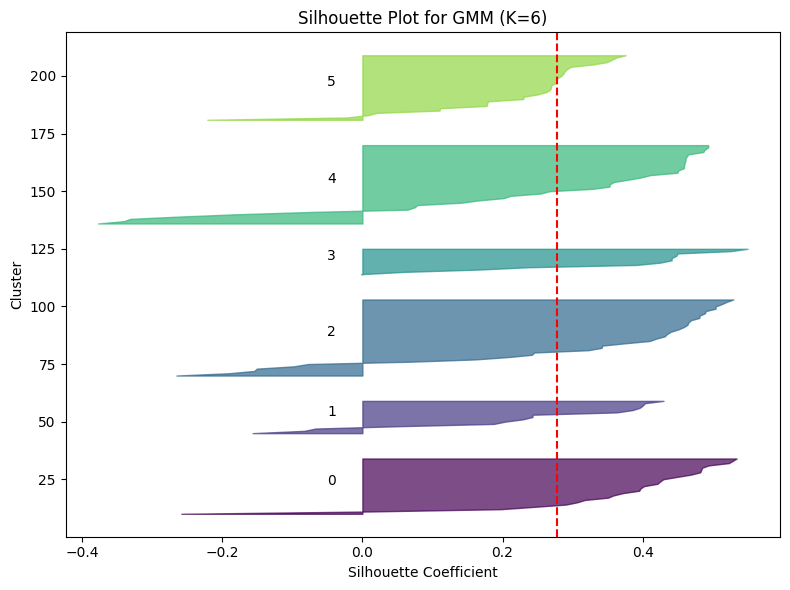

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X = iris.data  # We use all features for GMM

# Iterate over different numbers of clusters (K=2 to 6)
for k in range(2, 7):
    # Fit GMM
    gmm = GaussianMixture(n_components=k, random_state=2782)
    labels = gmm.fit_predict(X)
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(X, labels)
    print(f"GMM (K={k}), Silhouette Score: {silhouette_avg:.3f}")
    
    # Create silhouette plot
    fig, ax = plt.subplots(figsize=(8, 6))
    sample_silhouette_values = silhouette_samples(X, labels)
    y_lower = 10  # Padding between clusters in the plot
    
    for i in range(k):
        # Aggregate silhouette scores for samples in cluster i
        ith_cluster_silhouette = sample_silhouette_values[labels == i]
        ith_cluster_silhouette.sort()
        
        # Plot silhouette for cluster i
        size_cluster_i = ith_cluster_silhouette.shape[0]
        y_upper = y_lower + size_cluster_i
        color = plt.cm.viridis(float(i) / k)  # Color mapping
        
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        
        # Label clusters
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # Add padding for next cluster
    
    # Add average silhouette score line
    ax.axvline(silhouette_avg, color="red", linestyle="--")
    ax.set_xlabel("Silhouette Coefficient")
    ax.set_ylabel("Cluster")
    ax.set_title(f"Silhouette Plot for GMM (K={k})")
    plt.tight_layout()
    plt.show()

**3.**

- K-Means is effective for clusters that are spherical in shape and tends to yield higher silhouette scores for optimal values of K, typically around 2 or 3.

- On the other hand, Gaussian Mixture Models (GMM) can effectively handle elliptical clusters. BIC frequently suggests that the best number of clusters, K, is 3, which aligns with the actual number of species in the Iris dataset. 

- Overall, GMM with K=3 selected by BIC is the superior choice because of its ability to accommodate various cluster shapes.

**4.**

In [ ]:
#a
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=2782)
X_pca = pca.fit_transform(X)

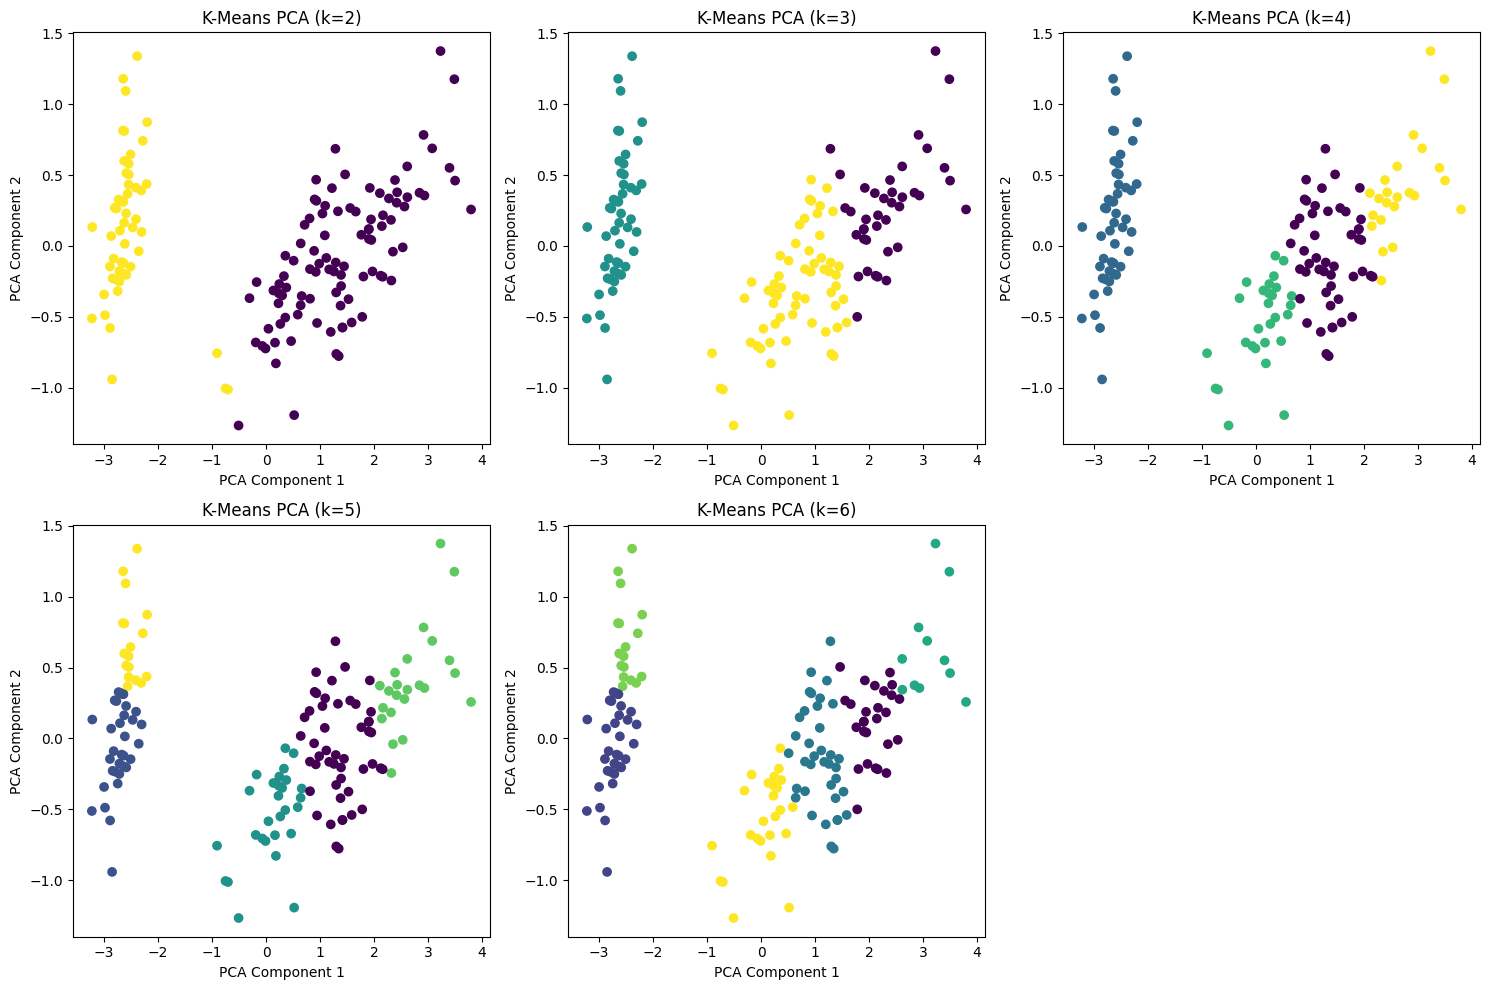

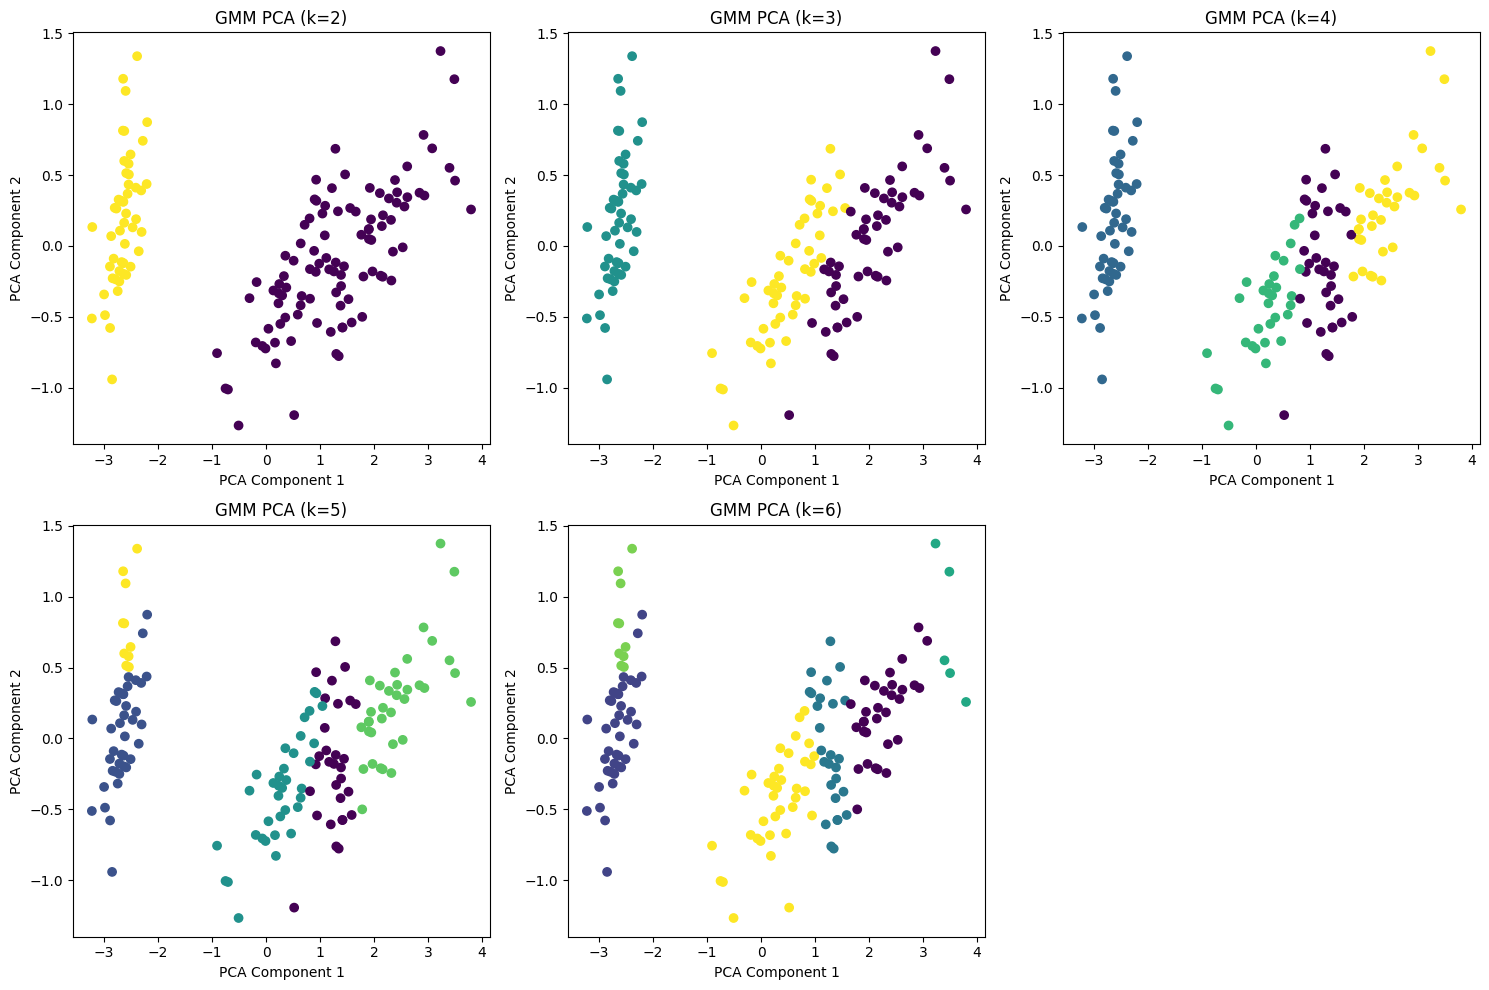

In [32]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
#b and c:

plt.figure(figsize=(15, 10))
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=2782)
    clusters = kmeans.fit_predict(X_pca)
    
    # 4c. Plot cluster assignments
    plt.subplot(2, 3, k-1)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
    plt.title(f'K-Means PCA (k={k})')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()

# GMM on PCA data
plt.figure(figsize=(15, 10))
for k in range(2, 7):
    gmm = GaussianMixture(n_components=k, random_state=2782)
    clusters = gmm.fit_predict(X_pca)
    
    plt.subplot(2, 3, k-1)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
    plt.title(f'GMM PCA (k={k})')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()

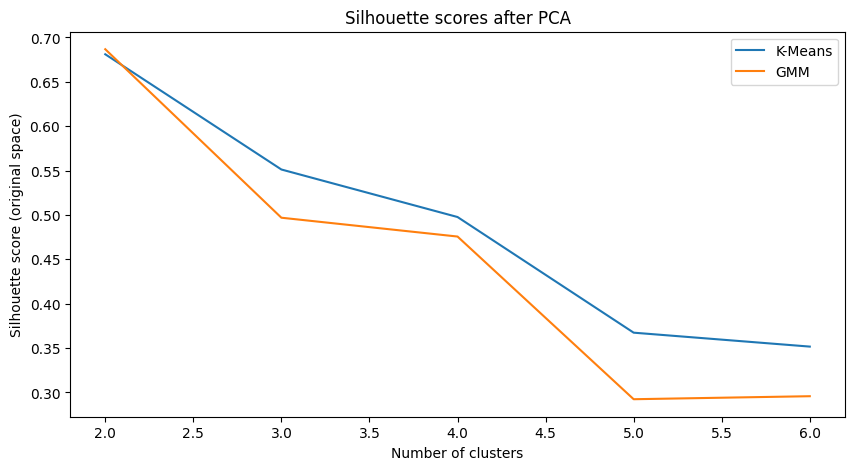

In [28]:
kmeans_scores = []
gmm_scores = []

for k in range(2, 7):
    # K-Means
    kmeans = KMeans(n_clusters=k, random_state=2782)
    clusters = kmeans.fit_predict(X_pca)
    kmeans_scores.append(silhouette_score(X, clusters))
    
    # GMM
    gmm = GaussianMixture(n_components=k, random_state=2782)
    clusters = gmm.fit_predict(X_pca)
    gmm_scores.append(silhouette_score(X, clusters))

# Plot silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(range(2, 7), kmeans_scores, label='K-Means')
plt.plot(range(2, 7), gmm_scores, label='GMM')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score (original space)')
plt.title('Silhouette scores after PCA')
plt.legend()
plt.show()

- PCA slightly degrades clustering performance (lower silhouette scores). This is because PCA removes some variance that may be useful for clustering". However, the difference is small and PCA can help with visualization.